In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 读取经过预处理的训练集

In [2]:
features_data = pd.read_csv('../datasets/train_preprocess.csv', parse_dates=['Dates'])

In [3]:
features_data.head(1)

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y,Year,Month,Day,Hour,DayOfWeekID,PdDistrictID,HasBlock,PositionType,PositionTypeID
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,6,4,0,CrossRoad,5


In [4]:
categories = features_data['Category'].unique()
categories.sort()

### 按星期几显示案件类型数量

In [5]:
def show_bar_by_column(data, base_feature, 
                       counter_feature="Category", name=None, cols=4,  barh=False, figsize=(10,10)):
    categories = data[counter_feature].unique()
    nums = len(categories)
    rows = nums//cols+1
    lables = data[base_feature].unique()

    plt.figure(num=name, figsize=figsize)
    for i, cate in enumerate(categories):
        plt.subplot(rows,cols, i+1)
        temp = data.loc[:, [base_feature, counter_feature]]
        cnts = temp.loc[temp[counter_feature]==cate, base_feature].value_counts()
        show_data = [cnts[lable] if lable in cnts else 0 for lable in lables]
        if barh:
            plt.barh(y=lables, width=show_data)
        else:
            plt.bar(x=lables, height=show_data)
        plt.title(cate)

    plt.show()

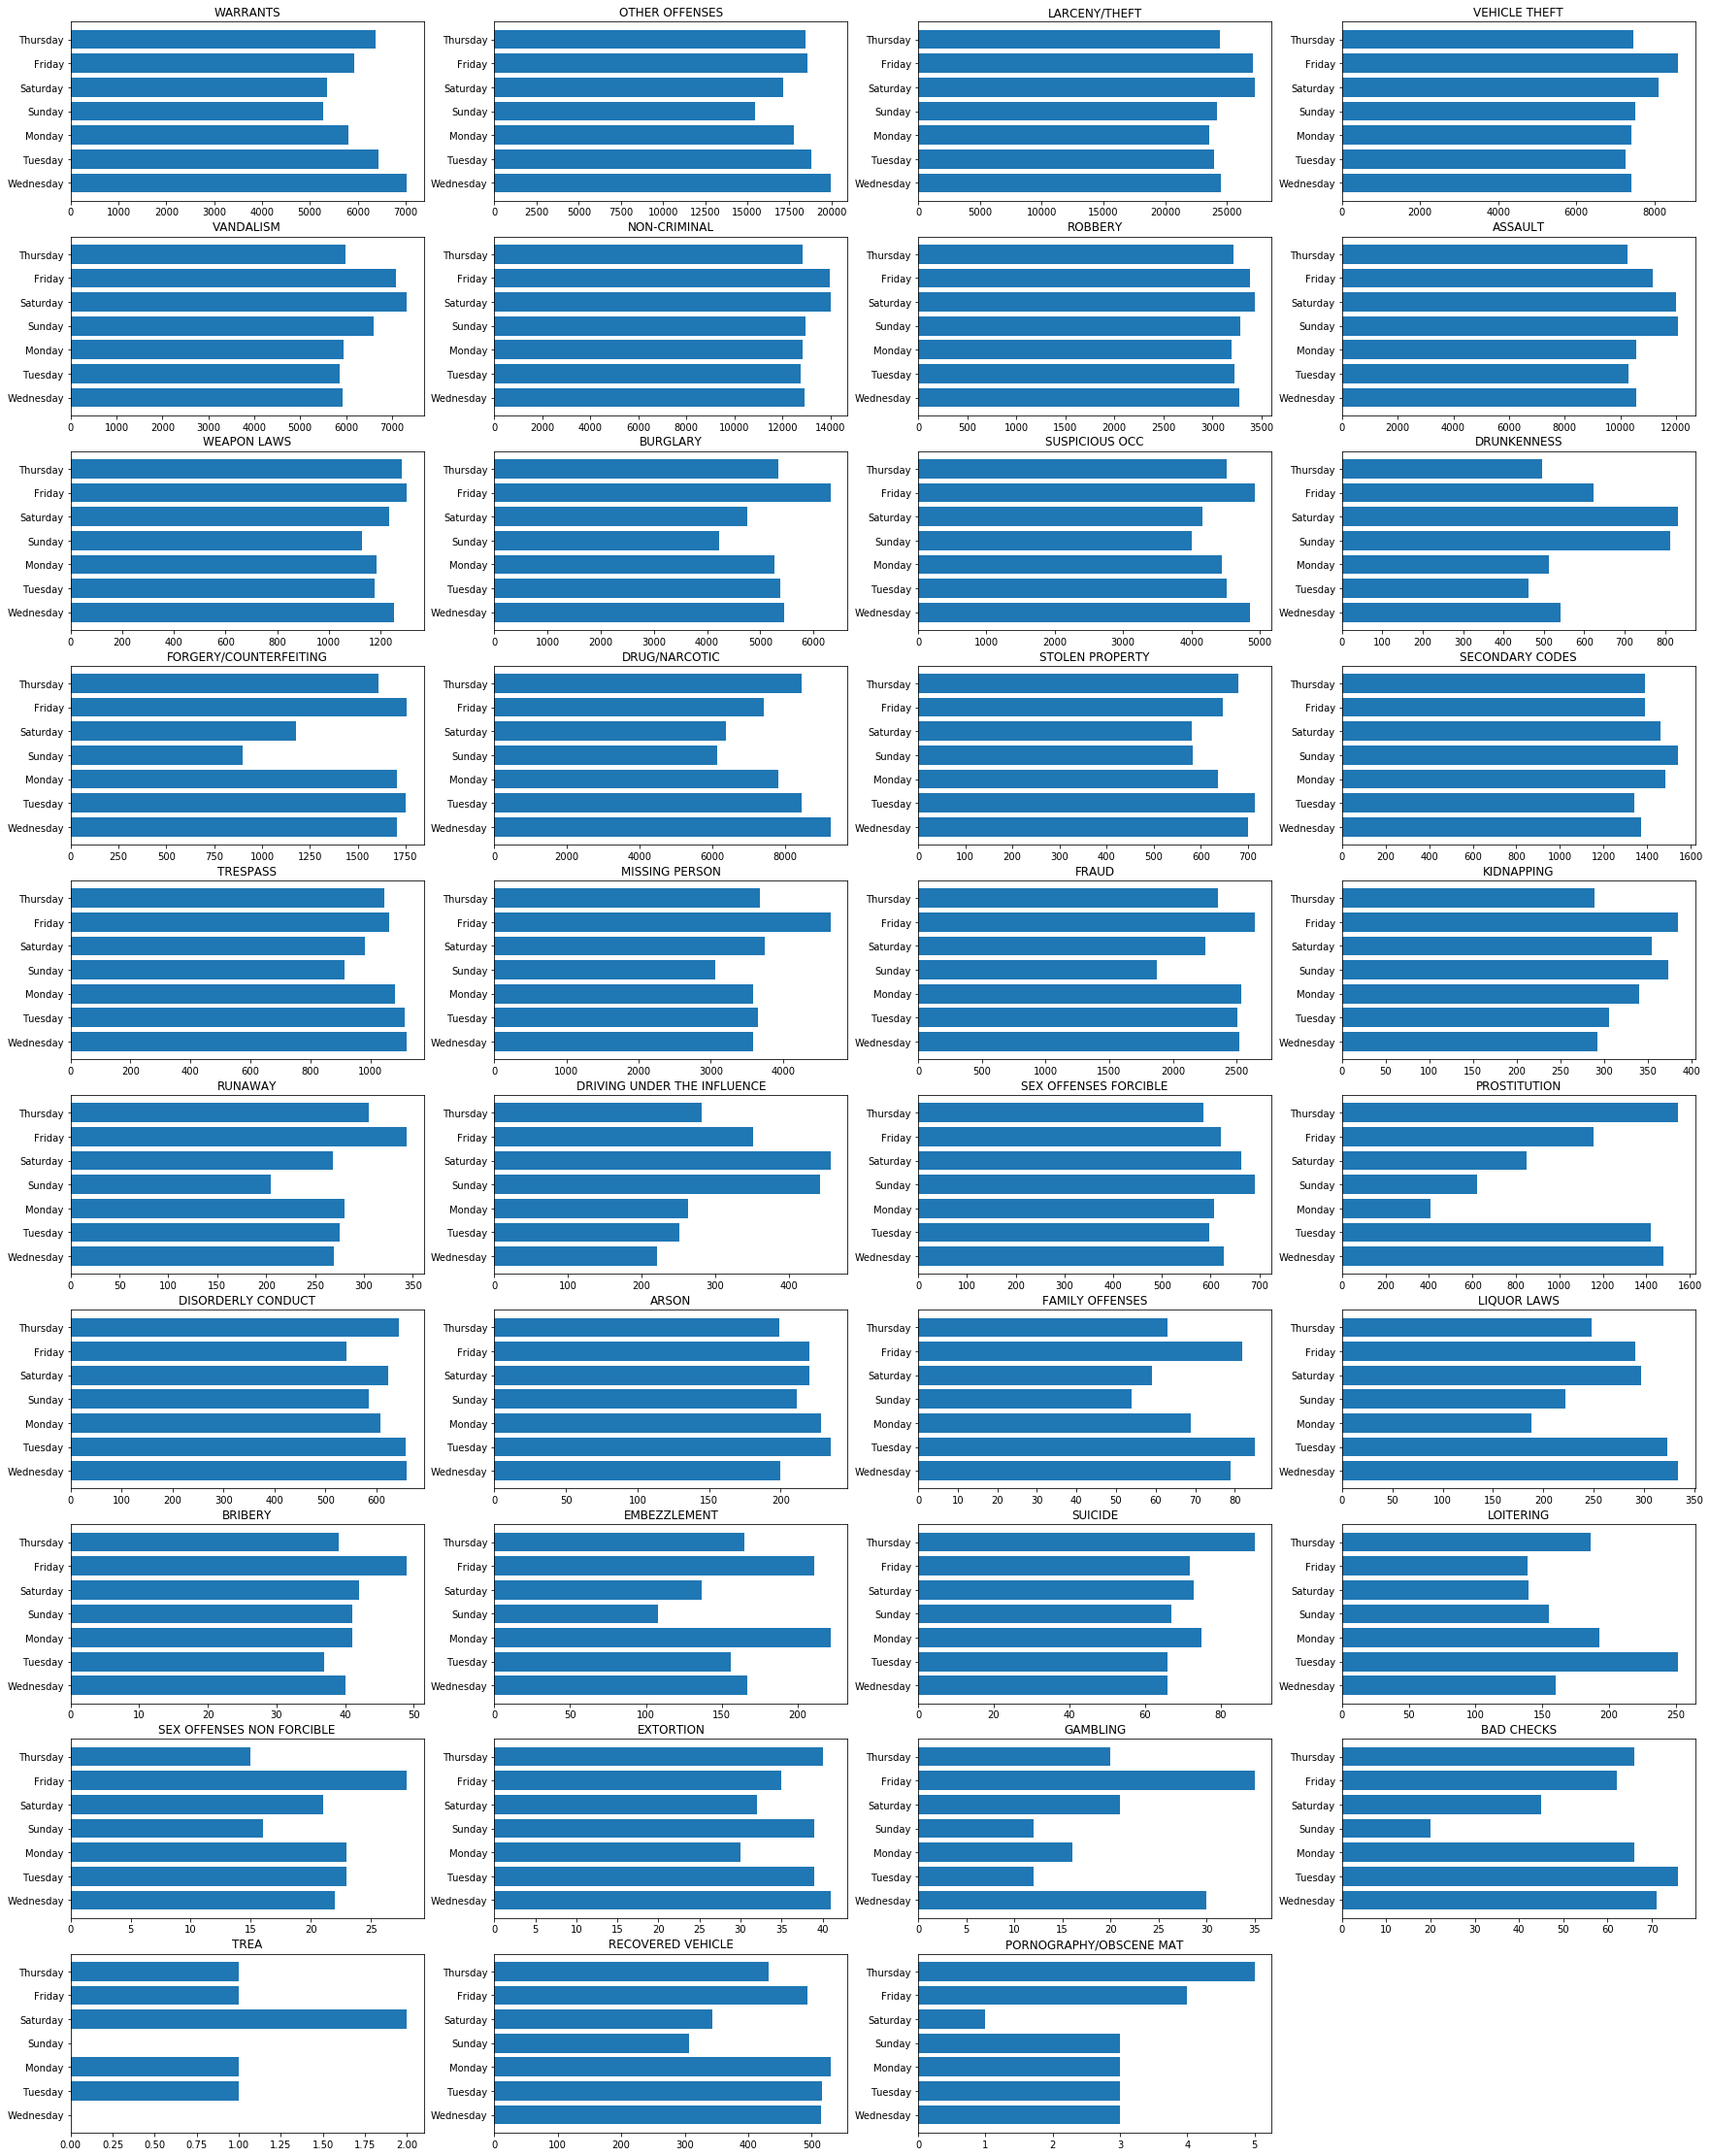

In [6]:
show_bar_by_column(data=features_data, 
                   base_feature="DayOfWeek",
                   name='weekday_and_categories',                
                   barh=True, 
                   figsize=(30,40))

从图表中可以看出，对于一种罪案类型，每天发生的次数基本持平，对于预测犯罪类型，星期几这个特征可以意义不大。

### 按小时显示案件类型数

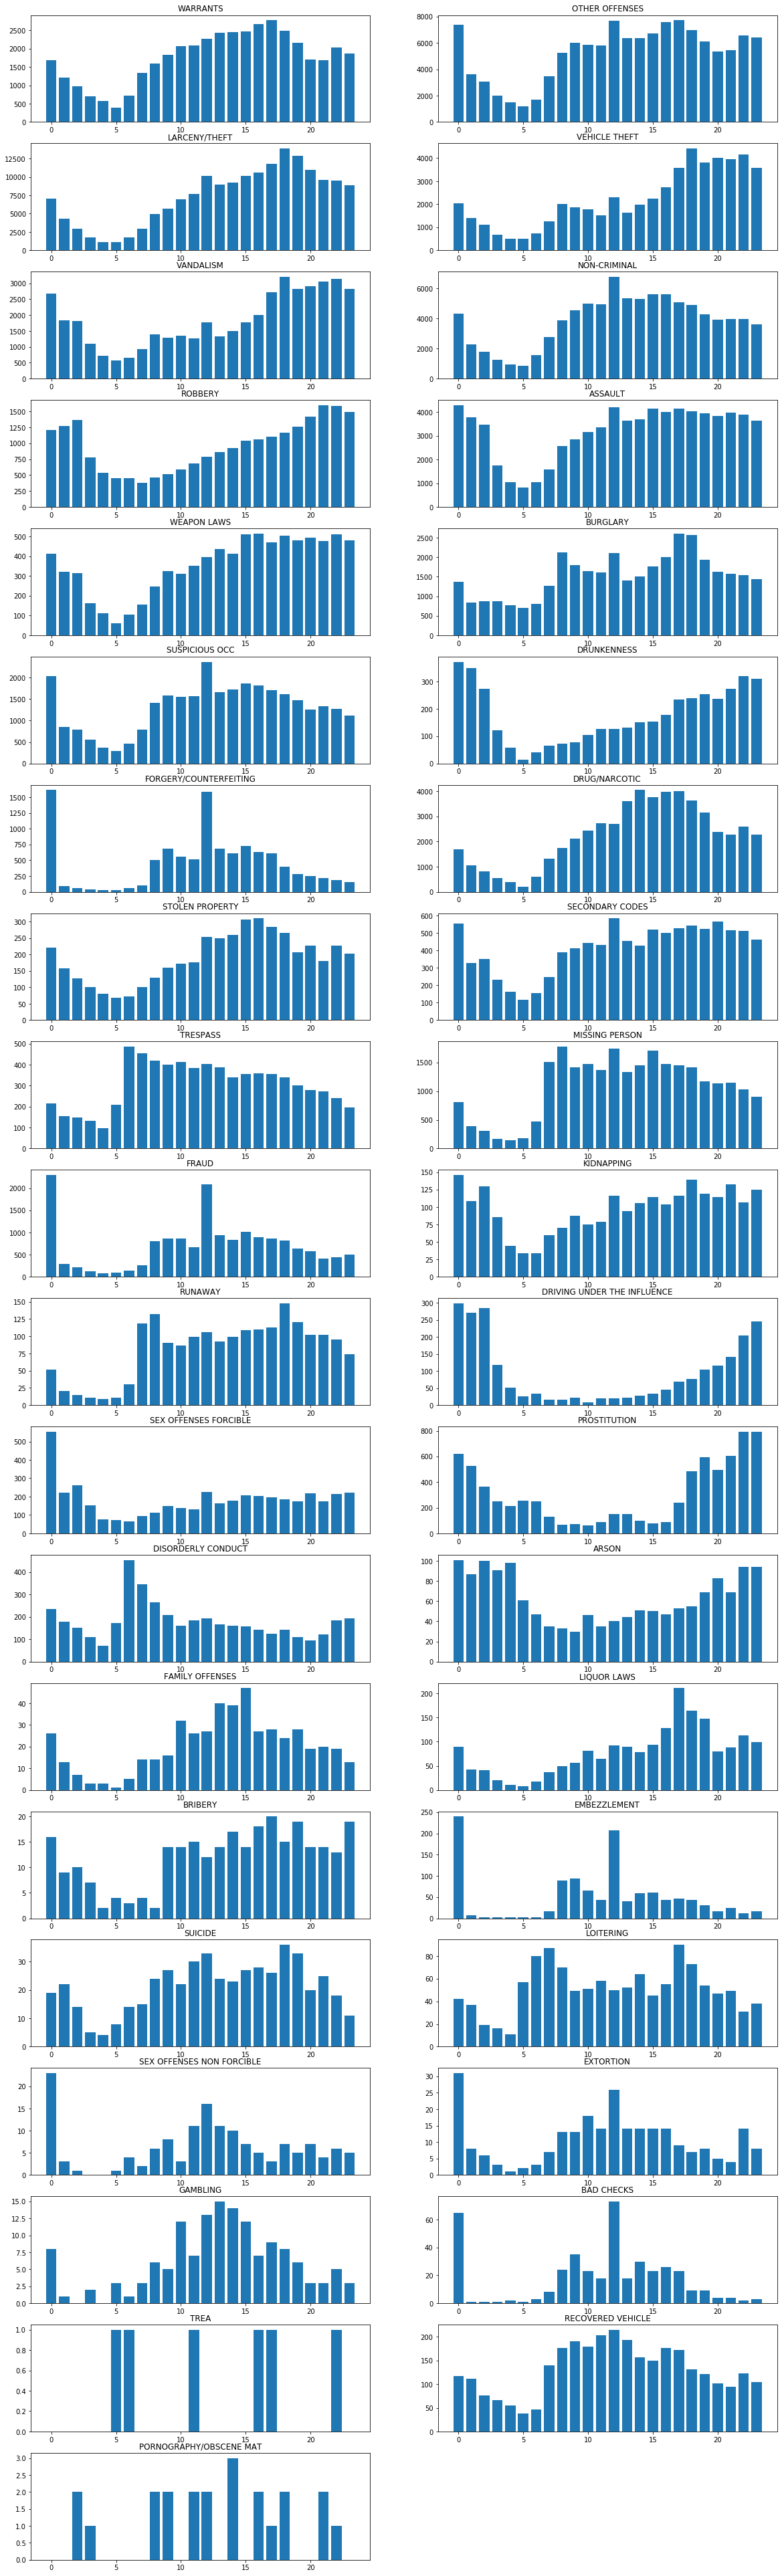

In [7]:
show_bar_by_column(data=features_data, 
                   base_feature="Hour",
                   name='hour_and_categories', 
                   cols=2,
                   figsize=(20,70))

### 按PdDistrict显示案件类型数

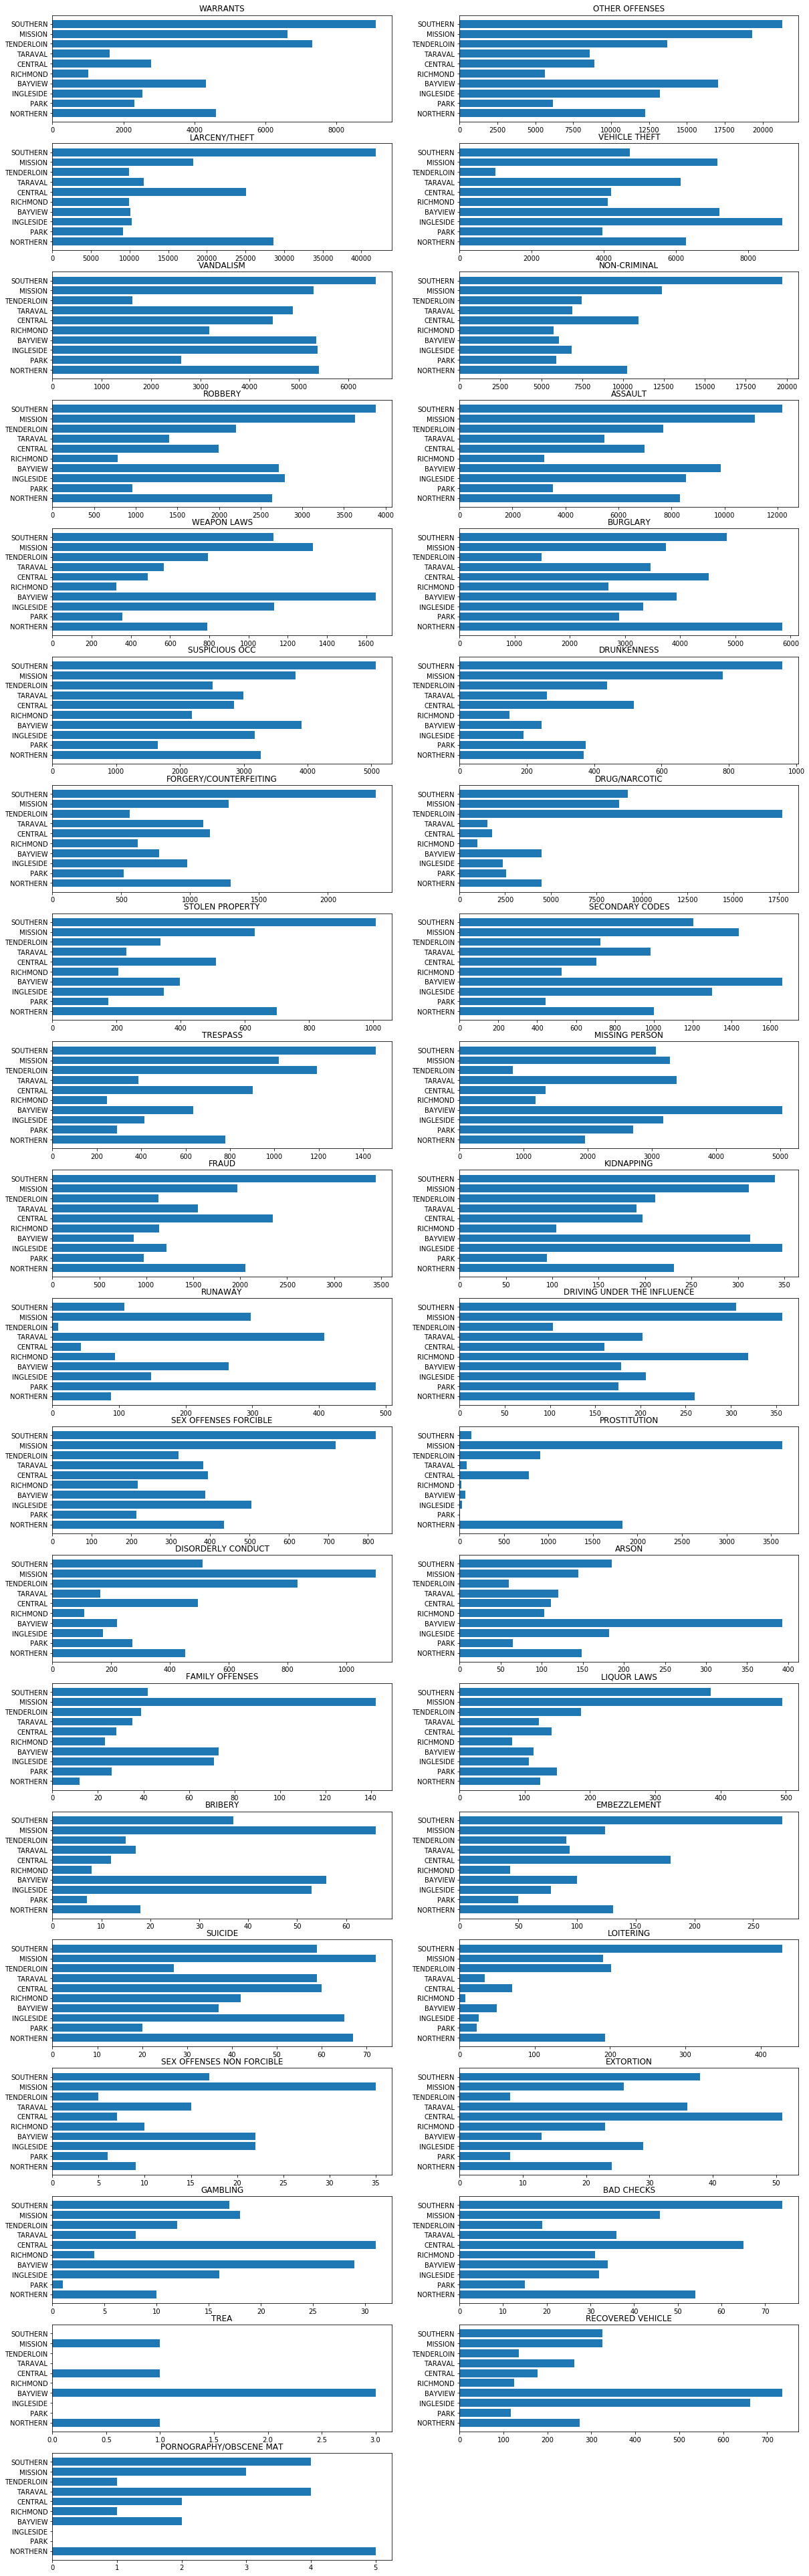

In [8]:
show_bar_by_column(data=features_data, 
                   base_feature="PdDistrict",
                   name='pddistrict_and_categories', 
                   cols=2,
                   barh=True,
                   figsize=(20,70))

#### 按PositionType显示案件数

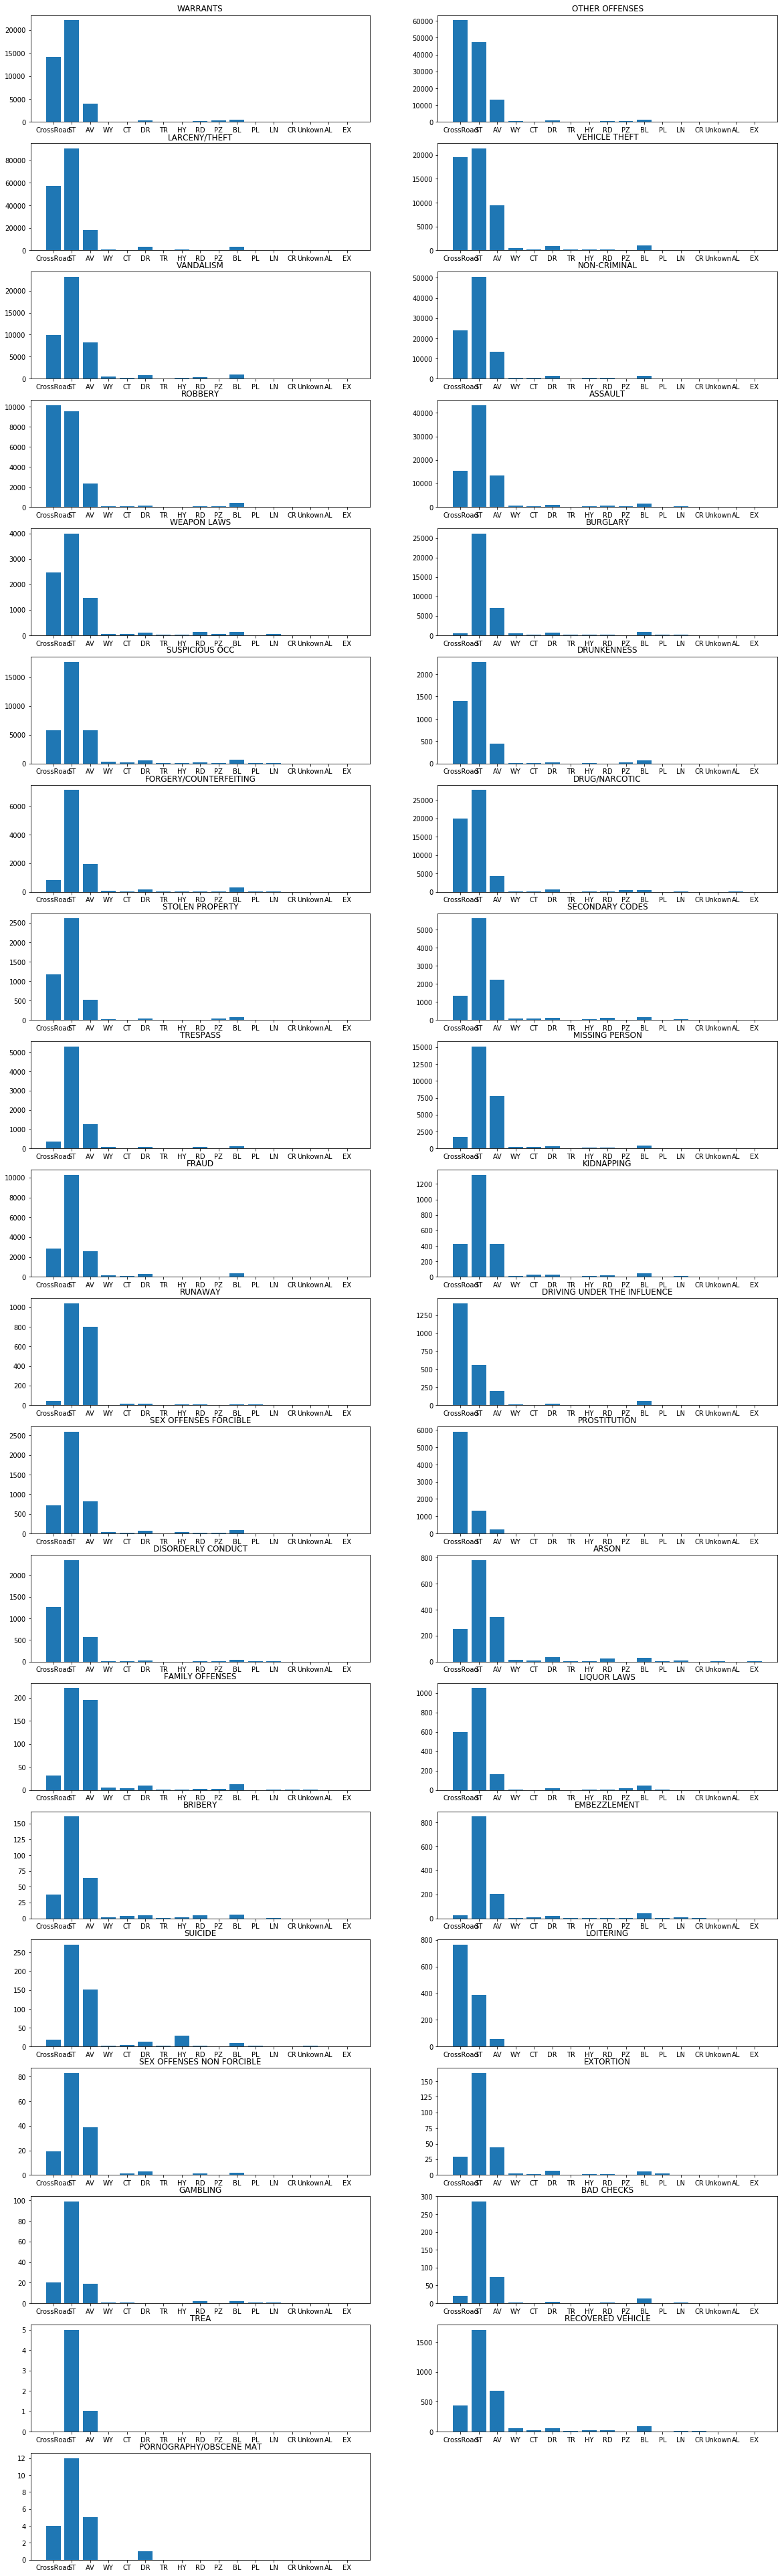

In [9]:
show_bar_by_column(data=features_data, 
                   base_feature="PositionType",
                   name='positiontype_and_categories', 
                   cols=2,
                   figsize=(20,70))

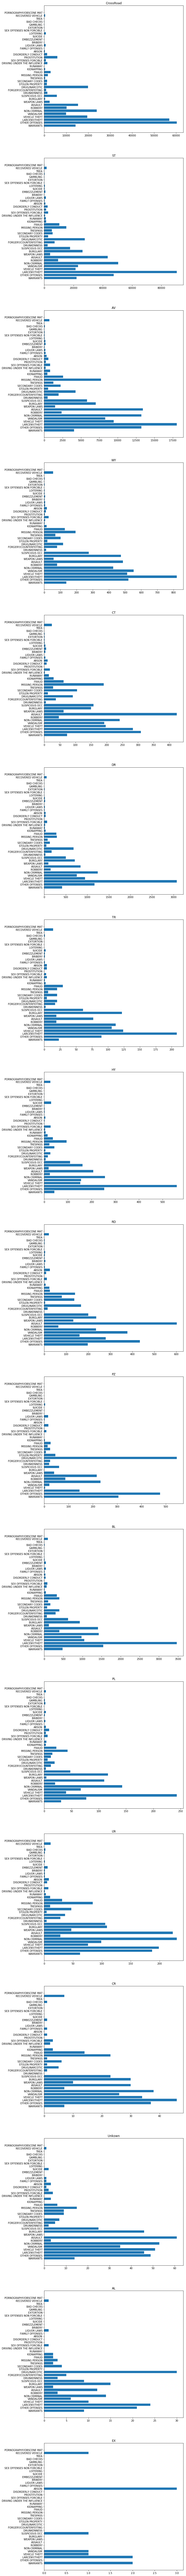

In [10]:
show_bar_by_column(data=features_data, 
                   base_feature="Category",
                   counter_feature="PositionType",
                   name='positiontype_and_categories', 
                   cols=1,
                   barh=True,
                   figsize=(10,200))